# Basic usage - load folder context and use the default pipeline

In [1]:
%matplotlib inline
from lightroot.detection import preprocessing
from lightroot.context import context
c = context.folder_context("C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)",77,81)
c["show_progress"] = False
#c["transforms"] = False
#c.run()
#c._iom.try_make_video()
#replot some frames using the data and re-make video e.g. remove annoying vector artifact

The directory ./cached_datax should be empty. Do you want to clear it? (y/n)n
01/08/2018 10:26:36|INFO||:>Setting a default value noise_trange:[0.01, 0.045]
01/08/2018 10:26:36|INFO||:>Setting a default value max_files:10000
01/08/2018 10:26:36|INFO||:>Setting a default value max_file_gap:100
01/08/2018 10:26:36|INFO||:>Setting a default value stack_file_format:C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)\Run0192_tp{:0>3}.tif
01/08/2018 10:26:36|INFO||:>Data dir is set to C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)
01/08/2018 10:26:36|INFO||:>Output dir is set to ./cached_datax
01/08/2018 10:26:36|INFO||:>Total_files:973
01/08/2018 10:26:36|INFO||:>Total_tiff_files:973
01/08/2018 10:26:36|INFO||:>Max_good_index:484
01/08/2018 10:26:36|INFO||:>First_good_index:0
01/08/2018 10:26:36|INFO||:>Frame_gaps:{}
01/08/2018 10:26:36|INFO||:>***********BEGIN PROCESSING LOOP***********
01/08/2018 10:26:36|INFO||:>loading settings file ./settings.json


In [2]:
fr = c.load_frame(2)
fr.shape

(60, 1040, 1392)

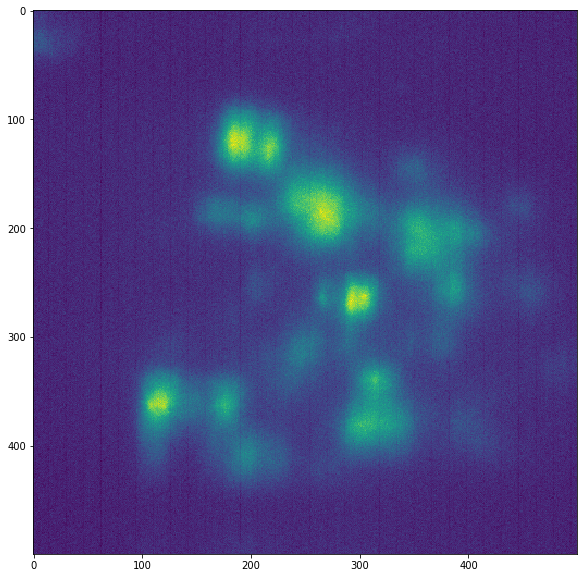

In [4]:
frg = fr.sum(0)
frgh = frg[300:800,300:800]
c.plot(frgh)

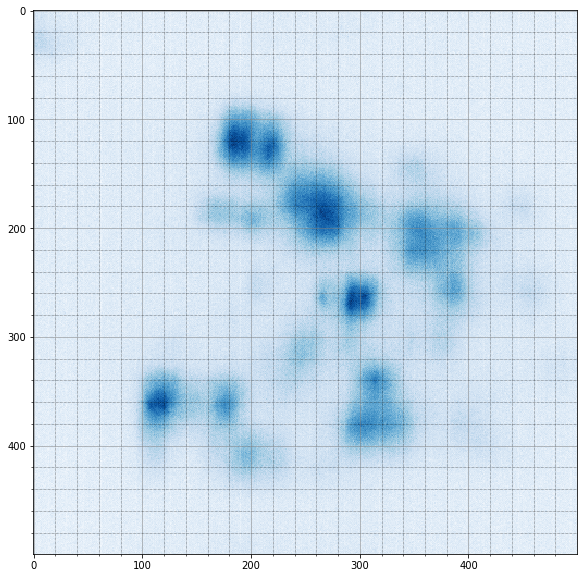

In [8]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,figsize=(20,10))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.imshow(frgh,"Blues")

# Run the tracker only
There is usually a data.csv or data.csv.cpt file to use in the cache. 

In [4]:
from lightroot.tracking import tpctree
from lightroot import plots
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
%matplotlib inline
result = tpctree.process_file("./cached_datax/data.csv",
                              start=0,end=5,
                              options={"transforms":True, 
                                       "epsilon":17, })

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.85s/it]


In [ ]:
result.data.head()

# Pipelines
The run method can take a collection of "pipe" functions to build more flexible pipelines. Image processing can be a nuisance and this architecture is supposed to help.

The idea is that the "pipe" function signature is consitently 

In [ ]:
def pipe(image, context, properties):
    #do something to the image
    return image

If every pipeline function has this sig, they can all be unit tested and chained together by the context manager. They should not all trip over each other re-computing things but share resources.

The context stores global image properties that can be determined up front. See inside context where the analysis.set_frame_statistics is called. 

This could be extended to add more frame metrics that are "read-only" with respect to the frame. The empty pipeline is passed in the example below and this will simply read frames, analyse frames and save them to the output dir without any processing or modification

In [ ]:
#the empty pipeline simply analyses images
c.run([])

Custom pipelines can transform images from one state to another. If no argument is passed to the run method, the default pipeline tries to build the point cloud from the data and track individuals